# Day 12: Population

I've already plotted population for an earlier day (Day 10), but perhaps this time I can visualize it in a different way. A few weeks ago, I saw a map that overlaid bar plots, and so I wanted to see if I could recreate that concept.

## Configuration

In [1]:
import os
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Desired styling for matplotlib
from matplotlib import cycler
colors = cycler('color',["44aa98","ab4498","332389","86ccec","ddcc76","cd6477","882255", "117732"])
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['text.color'] = '212121'
plt.rcParams['xtick.color'] = '212121'
plt.rcParams['ytick.color'] = '212121'
plt.rcParams['font.family'] = 'sans serif'
plt.rcParams['axes.facecolor'] = 'None'
plt.rcParams['axes.edgecolor'] = 'dimgray'
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.grid'] = False
plt.rcParams['grid.color'] = 'lightgray'
plt.rcParams['grid.linestyle'] = 'dashed'
plt.rcParams['xtick.labelsize'] = 'x-small'
plt.rcParams['ytick.labelsize'] = 'x-small'
plt.rcParams['legend.frameon'] = True
plt.rcParams['legend.framealpha'] = 0.8
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'None'
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['axes.labelsize'] = 'small'
plt.rcParams['savefig.facecolor'] = 'None'
plt.rcParams['savefig.edgecolor'] = 'None'
plt.rc('axes', prop_cycle=colors)

# geoBoundaries
Administrative boundary shapefiles are courtesy geoBoundaries 4.0: Comprehensive Global Administrative Zones (CGAZ). These boundaries are simplified to 10% of the original data (full resolution single-country products), both of which are available from [https://www.geoboundaries.org/](https://www.geoboundaries.org/)

*Runfola, Daniel, Community Contributors, and [v4.0: Lindsey Rogers, Joshua Habib, Sidonie Horn, Sean Murphy, Dorian Miller, Hadley Day, Lydia Troup, Dominic Fornatora, Natalie Spage, Kristina Pupkiewicz, Michael Roth, Carolina Rivera, Charlie Altman, Isabel Schruer, Tara McLaughlin, Russ Biddle, Renee Ritchey, Emily Topness, James Turner, Sam Updike, Helena Buckman, Neel Simpson, Jason Lin], [v2.0: Austin Anderson, Heather Baier, Matt Crittenden, Elizabeth Dowker, Sydney Fuhrig, Seth Goodman, Grace Grimsley, Rachel Layko, Graham Melville, Maddy Mulder, Rachel Oberman, Joshua Panganiban, Andrew Peck, Leigh Seitz, Sylvia Shea, Hannah Slevin, Rebecca Yougerman, Lauren Hobbs]. "geoBoundaries: A global database of political administrative boundaries." Plos one 15, no. 4 (2020): e0231866.*

In [3]:
# Map to path
data_folder = os.path.join("..", "data")
adm_folder = os.path.join(data_folder, "admin")
adm_file = "geoBoundariesCGAZ_ADM0.shp"
adm_path = os.path.join(adm_folder, adm_file)

# Read in data at GeoDataFrame
adm = gpd.read_file(adm_path, encoding='utf-8')

# Preview
adm.head(5)

,ISO_CODE,COUNTRY_NA,Shape_Le_1,FID,geometry
0,AFG,None,NaN,None,"POLYGON ((74.88986 37.23409, 74.88962 37.23314..."
1,GBR,None,NaN,None,"MULTIPOLYGON (((33.01302 34.64377, 33.01275 34..."
2,ALB,None,NaN,None,"POLYGON ((20.07890 42.55580, 20.07928 42.55546..."
3,DZA,None,NaN,None,"POLYGON ((8.64194 36.94096, 8.64195 36.94070, ..."
4,USA,None,NaN,None,"MULTIPOLYGON (((-168.15791 -14.53181, -168.161..."


# United Nations

Population estimates (including the breakdown between the urban and rural population) are from the 2018 revision of the [World Urbanization Prospects](https://population.un.org/wup/).

I've modified the dataset to include the ISO3 country codes. To map between the numeric country codes (on the UN data) and the alpha3 country codes (on geoBoundaries), I used [World countries](https://stefangabos.github.io/world_countries/) data.

In [4]:
# Map to path
pop_folder = os.path.join(data_folder, "etc", "un-wup")
pop_file = "WUP2018-F01-Total_Urban_Rural.xls"
pop_path = os.path.join(pop_folder, pop_file)

# Read file into pandas dataframe
pop = pd.read_excel(pop_path, sheet_name='Data', skiprows=16)

# Reduce to national data
pop = pop[pop.ISO3.notna()].copy()

# Convert population data to ones (original is in thousands)
pop_cols = ['Urban', 'Rural', 'Total']
pop[pop_cols] = pop[pop_cols].mul(1e3)

# Preview
pop.head(5)

,Index,"Region, subregion, country or area",Note,ISO3,Country\ncode,Urban,Rural,Total,Percentage urban
14,15,Burundi,NaN,BDI,108,1461704.0,9754746.0,11216450.0,13.031788
15,16,Comoros,NaN,COM,174,241092.0,591255.0,832347.0,28.965323
16,17,Djibouti,NaN,DJI,262,755533.0,215875.0,971408.0,77.777103
17,18,Eritrea,NaN,ERI,232,2079314.0,3108634.0,5187948.0,40.079700
18,19,Ethiopia,NaN,ETH,231,22327769.0,85207113.0,107534882.0,20.763280


In [5]:
# Merge with geoBoundaries data
adm_poly = pd.merge(adm, pop, left_on='ISO_CODE', right_on='ISO3', how='left')

# Preview
adm_poly.head(5)

,ISO_CODE,COUNTRY_NA,Shape_Le_1,FID,geometry,Index,"Region, subregion, country or area",Note,ISO3,Country\ncode,Urban,Rural,Total,Percentage urban
0,AFG,None,NaN,None,"POLYGON ((74.88986 37.23409, 74.88962 37.23314...",95.0,Afghanistan,NaN,AFG,4.0,9273302.0,27099874.0,36373176.0,25.494892
1,GBR,None,NaN,None,"MULTIPOLYGON (((33.01302 34.64377, 33.01275 34...",160.0,United Kingdom,NaN,GBR,826.0,55521226.0,11052278.0,66573504.0,83.398383
2,ALB,None,NaN,None,"POLYGON ((20.07890 42.55580, 20.07928 42.55546...",162.0,Albania,NaN,ALB,8.0,1769975.0,1164388.0,2934363.0,60.318884
3,DZA,None,NaN,None,"POLYGON ((8.64194 36.94096, 8.64195 36.94070, ...",46.0,Algeria,NaN,DZA,12.0,30510016.0,11498038.0,42008054.0,72.628968
4,USA,None,NaN,None,"MULTIPOLYGON (((-168.15791 -14.53181, -168.161...",245.0,United States of America,NaN,USA,840.0,268786714.0,57980034.0,326766748.0,82.256446


In [6]:
# Get points
adm_points = adm_poly.copy()
adm_points["rep"] = adm_points.geometry.representative_point()
adm_points.set_geometry("rep", inplace=True)

# Preview
adm_points.head(5)

,ISO_CODE,COUNTRY_NA,Shape_Le_1,FID,geometry,Index,"Region, subregion, country or area",Note,ISO3,Country\ncode,Urban,Rural,Total,Percentage urban,rep
0,AFG,None,NaN,None,"POLYGON ((74.88986 37.23409, 74.88962 37.23314...",95.0,Afghanistan,NaN,AFG,4.0,9273302.0,27099874.0,36373176.0,25.494892,POINT (65.20424 33.93397)
1,GBR,None,NaN,None,"MULTIPOLYGON (((33.01302 34.64377, 33.01275 34...",160.0,United Kingdom,NaN,GBR,826.0,55521226.0,11052278.0,66573504.0,83.398383,POINT (-1.91833 54.31500)
2,ALB,None,NaN,None,"POLYGON ((20.07890 42.55580, 20.07928 42.55546...",162.0,Albania,NaN,ALB,8.0,1769975.0,1164388.0,2934363.0,60.318884,POINT (20.02479 41.15282)
3,DZA,None,NaN,None,"POLYGON ((8.64194 36.94096, 8.64195 36.94070, ...",46.0,Algeria,NaN,DZA,12.0,30510016.0,11498038.0,42008054.0,72.628968,POINT (0.62548 28.02897)
4,USA,None,NaN,None,"MULTIPOLYGON (((-168.15791 -14.53181, -168.161...",245.0,United States of America,NaN,USA,840.0,268786714.0,57980034.0,326766748.0,82.256446,POINT (-99.56055 37.16103)


# Construct map
Using `Basemap` to create the plot

In [7]:
# Choose region of interest - South America
llcrnrlat = -50
llcrnrlon = -110
urcrnrlat = 12
urcrnrlon = -26

# Determine center point for projection
mid_lon = (urcrnrlon+llcrnrlon)/2.0
mid_lat = (urcrnrlat+llcrnrlat)/2.0

In [8]:
# Limit points to region of interest
adm_points_region = adm_points.cx[llcrnrlon:urcrnrlon, llcrnrlat:urcrnrlat]

# Print something
print(f"Found in region: {adm_points_region.ISO3.tolist()}")

Found in region: ['ARG', 'BOL', 'COL', 'BRA', 'CRI', 'CHL', 'ECU', 'GUY', 'PAN', 'PRY', 'PER', 'TTO', 'SUR', 'URY', 'VEN', nan]


In [9]:
# Limit polys to region of interest
adm_poly_region = adm_poly.cx[llcrnrlon:urcrnrlon, llcrnrlat:urcrnrlat]

# Print something
print(f"Found in region: {adm_poly_region.ISO3.tolist()}")

Found in region: ['ARG', 'NLD', 'BOL', 'COL', 'BRA', 'FRA', 'CRI', 'CHL', 'ECU', 'GRD', 'GUY', 'NIC', 'PAN', 'PRY', 'PER', 'TTO', 'SUR', 'URY', 'VEN', nan]


In [10]:
# Utility function - adjusted from 
# https://stackoverflow.com/questions/55854988/subplots-onto-a-basemap/55890475#55890475
def build_bar(mx, my, ax, xvals, yvals, width, fcolors):
    # Construct inset axes
    ax_h = inset_axes(ax,
                      width=width, 
                      height=width, 
                      loc='center',
                      bbox_to_anchor=(mx, my),
                      bbox_transform=ax.transData, 
                      borderpad=0,
                      axes_kwargs={'alpha': 0.35, 'visible': True})
    # Plot bars
    for x,y,c in zip(xvals, yvals, fcolors):
        ax_h.bar(x, y, label=str(x), fc=c)
    # Turn off axis
    ax_h.axis('off')
    return ax_h

Max population in region: 210,867,954


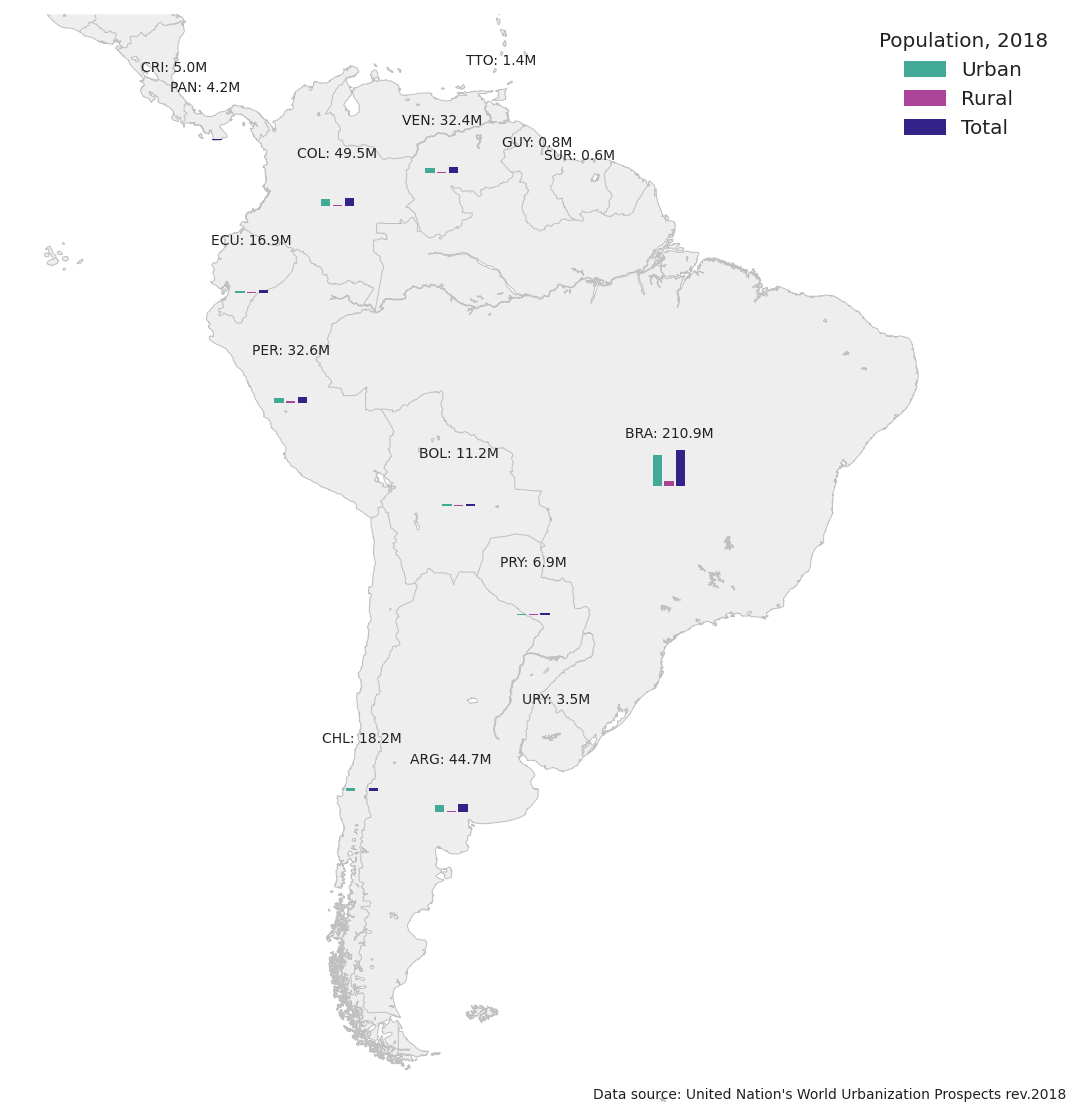

In [12]:
# Construct plot
fig, ax = plt.subplots(figsize=(10, 10))

# Create basemap
m = Basemap(llcrnrlat= llcrnrlat,
             llcrnrlon= llcrnrlon,
             urcrnrlat= urcrnrlat,
             urcrnrlon= urcrnrlon,
             ax = ax,
             resolution='i',
             projection='tmerc',
             lon_0=mid_lon,
             lat_0=mid_lat)

# Style continent and coastlines
m.fillcontinents(color='#eeeeee', lake_color="w", zorder=0)
m.drawcountries(color="silver", linewidth=0.5, zorder=1)
m.drawcoastlines(color='silver', linewidth=0.5, zorder=1)

# Bar axes styling
axes_width = 0.25
n_data = len(pop_cols)
bar_colors = [f'C{i}' for i in range(n_data)]

# Find max population data in region
max_pop = adm_points_region['Total'].max()
print(f"Max population in region: {max_pop:,.0f}")

# Plot population data
for i, row in adm_points_region.iterrows():
    if row.ISO3 == row.ISO3:
        bar_data = row[pop_cols].values
        x, y = row.rep.x, row.rep.y
        mx, my = m(x, y)
        bax = build_bar(
                        mx, 
                        my, 
                        ax,
                        list(range(n_data)),
                        bar_data,
                        axes_width,
                        bar_colors,
                       )
        bax.set_title(f"{row.ISO3}: {row.Total/1e6:.1f}M", fontsize="x-small")
        bax.set(ylim=(0,max_pop))

# Create legend
patches = [None for _ in range(n_data)]
for i in range(n_data):
    patches[i] = mpatches.Patch(color=bar_colors[i], label=pop_cols[i])
ax.legend(handles=patches, loc='best', title="Population, 2018")

# Turn off axis
ax.axis('off')

# Credit sources
ax.annotate("Data source: United Nation's World Urbanization Prospects rev.2018",
            xy=(1,0), xycoords='axes fraction',
            fontsize="x-small", ha="right", va="bottom",
           )

# Save plot
out_file = "12_Population.png"
out_path = os.path.join("..", "contributions", out_file)
fig.savefig(out_path, dpi=300, facecolor="w", bbox_inches="tight")

# Preview
plt.show()